In [1]:
import pandas as pds

In [2]:
table=pds.read_csv('hotel_bookings.csv')

In [3]:
table.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,96,2015,September,40,29,2,7,2,...,No Deposit,36.0,NaN,0,Transient,48.8,0,2,Check-Out,10/8/2015
1,Resort Hotel,0,61,2015,September,40,29,2,10,2,...,No Deposit,240.0,NaN,0,Transient,80.1,0,2,Check-Out,10/11/2015
2,Resort Hotel,0,19,2015,September,40,30,0,1,2,...,No Deposit,NaN,NaN,0,Transient,106.0,0,1,Check-Out,10/1/2015
3,Resort Hotel,0,50,2015,September,40,30,0,1,1,...,No Deposit,NaN,NaN,0,Transient,104.0,0,0,Check-Out,10/1/2015
4,Resort Hotel,0,0,2015,September,40,30,0,1,2,...,No Deposit,110.0,NaN,0,Transient,90.1,0,0,Check-Out,10/1/2015


In [4]:
table.shape

(38826, 32)

In [5]:
table.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              10
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4212
company                           37502


In [6]:
print(table['distribution_channel'].unique())

['TA/TO' 'Direct' 'Corporate' 'Undefined' 'GDS']


In [7]:
print(table['company'].unique())

[ nan 318. 103. 307. 110. 108. 268. 308. 154.  29. 270. 112. 272. 169.
 428.  88. 178. 195. 465. 135.  51.  78. 297. 146. 291. 331. 254.  94.
 484. 269. 504.  34. 225. 130. 390. 159. 520. 490. 507. 355. 506. 498.
 515. 353. 388. 459.  22. 405. 223. 116. 512. 126. 511. 371. 380.  64.
 274. 330. 242. 364. 263. 477. 518. 329. 367. 394.  59. 251.  72. 286.
 113. 521. 281. 523. 277. 282. 530. 539.  47. 437.  20. 358.  62. 290.
 384. 534. 337. 436.  39. 470. 525. 541.  40. 455. 410.  45.  38.   9.
  49.  48. 186. 153. 218. 179. 174. 253. 202. 216. 221. 219. 275. 233.
 280. 309. 321.  93. 316.  85. 107. 350. 279. 334. 348. 366.  67. 365.
  91. 407. 435. 150.  73. 385. 418. 197. 409. 450. 452. 466.  43. 115.]


In [8]:
mean_val=table['children'].mean();
table['children'].fillna(mean_val, inplace=True)

In [9]:
table.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              10
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4212
company                           37502


In [12]:
print(table['reserved_room_type'].unique())

['D' 'A' 'F' 'G' 'E' 'C' 'H' 'B' 'L' 'P']


In [13]:
table.replace(to_replace=['Resort Hotel', 'City Hotel'],
                value=['Resort','City'], inplace=True)
table.replace(to_replace=[ 'January', 'February' ,'March', 'April', 'May' ,'June', 'July', 'August' ,'September', 'October', 'November', 'December'],
                value=[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

In [14]:
table.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
final_dataset=table[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type'
       , 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]

In [16]:
final_dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort,0,96,2015,8,29,2,7,2,0.0,...,0,D,D,0,No Deposit,0,Transient,48.8,0,2
1,Resort,0,61,2015,8,29,2,10,2,0.0,...,0,A,A,0,No Deposit,0,Transient,80.1,0,2
2,Resort,0,19,2015,8,30,0,1,2,0.0,...,0,F,F,1,No Deposit,0,Transient,106.0,0,1
3,Resort,0,50,2015,8,30,0,1,1,1.0,...,0,A,E,0,No Deposit,0,Transient,104.0,0,0
4,Resort,0,0,2015,8,30,0,1,2,0.0,...,0,G,G,0,No Deposit,0,Transient,90.1,0,0


In [17]:
final_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [18]:
final_dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [19]:
final_dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort,0,96,2015,8,29,2,7,2,0.0,...,0,D,D,0,No Deposit,0,Transient,48.8,0,2
1,Resort,0,61,2015,8,29,2,10,2,0.0,...,0,A,A,0,No Deposit,0,Transient,80.1,0,2
2,Resort,0,19,2015,8,30,0,1,2,0.0,...,0,F,F,1,No Deposit,0,Transient,106.0,0,1
3,Resort,0,50,2015,8,30,0,1,1,1.0,...,0,A,E,0,No Deposit,0,Transient,104.0,0,0
4,Resort,0,0,2015,8,30,0,1,2,0.0,...,0,G,G,0,No Deposit,0,Transient,90.1,0,0


In [20]:
final_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [21]:
final_dataset.shape

(38826, 26)

In [22]:
final_dataset=pds.get_dummies(final_dataset, drop_first=True)

In [23]:
final_dataset.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,96,2015,8,29,2,7,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,61,2015,8,29,2,10,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,19,2015,8,30,0,1,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,50,2015,8,30,0,1,1,1.0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2015,8,30,0,1,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
final_dataset.shape

(38826, 59)

In [25]:
print(table['assigned_room_type'].unique())

['D' 'A' 'F' 'E' 'G' 'H' 'C' 'B' 'I' 'K' 'P' 'L']


In [26]:
final_dataset.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_roo

In [27]:
table.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [28]:
final_dataset.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.286117,-0.008882,0.015446,-0.026217,-0.143031,-0.121384,0.054586,-0.014972,-0.065021,...,-0.052513,-0.041054,-0.009529,0.049682,0.014851,0.211902,0.021399,-0.028413,0.083938,-0.089225
lead_time,0.286117,1.000000,0.013076,0.139074,-0.002945,0.038098,0.156747,0.115104,-0.055619,-0.021092,...,-0.017230,-0.012951,-0.005581,0.010433,0.002005,0.061606,0.008197,-0.009614,0.101126,-0.080696
arrival_date_year,-0.008882,0.013076,1.000000,-0.576977,-0.030508,0.030578,0.055826,-0.004624,0.030828,-0.002370,...,-0.041408,-0.036103,0.010700,-0.013339,0.000706,0.160965,-0.004865,-0.020953,-0.071418,0.042616
arrival_date_month,0.015446,0.139074,-0.576977,1.000000,0.002263,0.039832,0.038333,0.067510,0.016782,0.010442,...,0.009146,0.014120,-0.002027,-0.041743,-0.006620,-0.108940,0.020921,0.011796,0.074652,-0.034566
arrival_date_day_of_month,-0.026217,-0.002945,-0.030508,0.002263,1.000000,0.012304,-0.034629,0.011793,0.020084,0.004319,...,-0.009536,0.001900,-0.001526,-0.017908,-0.013225,-0.011492,0.014541,-0.001281,0.003528,-0.001632
stays_in_weekend_nights,-0.143031,0.038098,0.030578,0.039832,0.012304,1.000000,0.583449,0.097094,0.051682,0.026348,...,0.009965,0.015999,-0.002742,-0.021035,-0.002239,-0.034857,0.000988,0.009029,0.023938,-0.026232
stays_in_week_nights,-0.121384,0.156747,0.055826,0.038333,-0.034629,0.583449,1.000000,0.093867,0.040773,0.021660,...,0.006411,0.009858,0.002228,-0.002980,-0.001806,-0.025086,0.007974,0.003282,0.009955,0.000191
adults,0.054586,0.115104,-0.004624,0.067510,0.011793,0.097094,0.093867,1.000000,0.038647,0.031320,...,0.000872,-0.001322,0.006013,0.004321,0.004909,0.007647,0.008695,-0.013997,0.034768,-0.031285
children,-0.014972,-0.055619,0.030828,0.016782,0.020084,0.051682,0.040773,0.038647,1.000000,0.027155,...,0.002672,0.004375,-0.005075,0.004299,0.016364,0.010989,0.002030,-0.000865,0.020732,-0.027644
babies,-0.065021,-0.021092,-0.002370,0.010442,0.004319,0.026348,0.021660,0.031320,0.027155,1.000000,...,0.015262,-0.004730,0.011674,-0.004947,-0.001525,-0.019209,-0.001804,0.001881,0.002861,0.000623


In [29]:
#Now to Show Correltion In Graphical Manner we Use 'SEABORN'
# if Using seaborn first_time it might show an error
# don't worry just do 
#>pip install seaborn
import seaborn as sns

In [ ]:
sns.pairplot(final_dataset)                  #do not run this, it will stuck for more than 10 mins

In [30]:
# To better understand we use heatmap of correlation
import matplotlib.pyplot as plot
%matplotlib inline

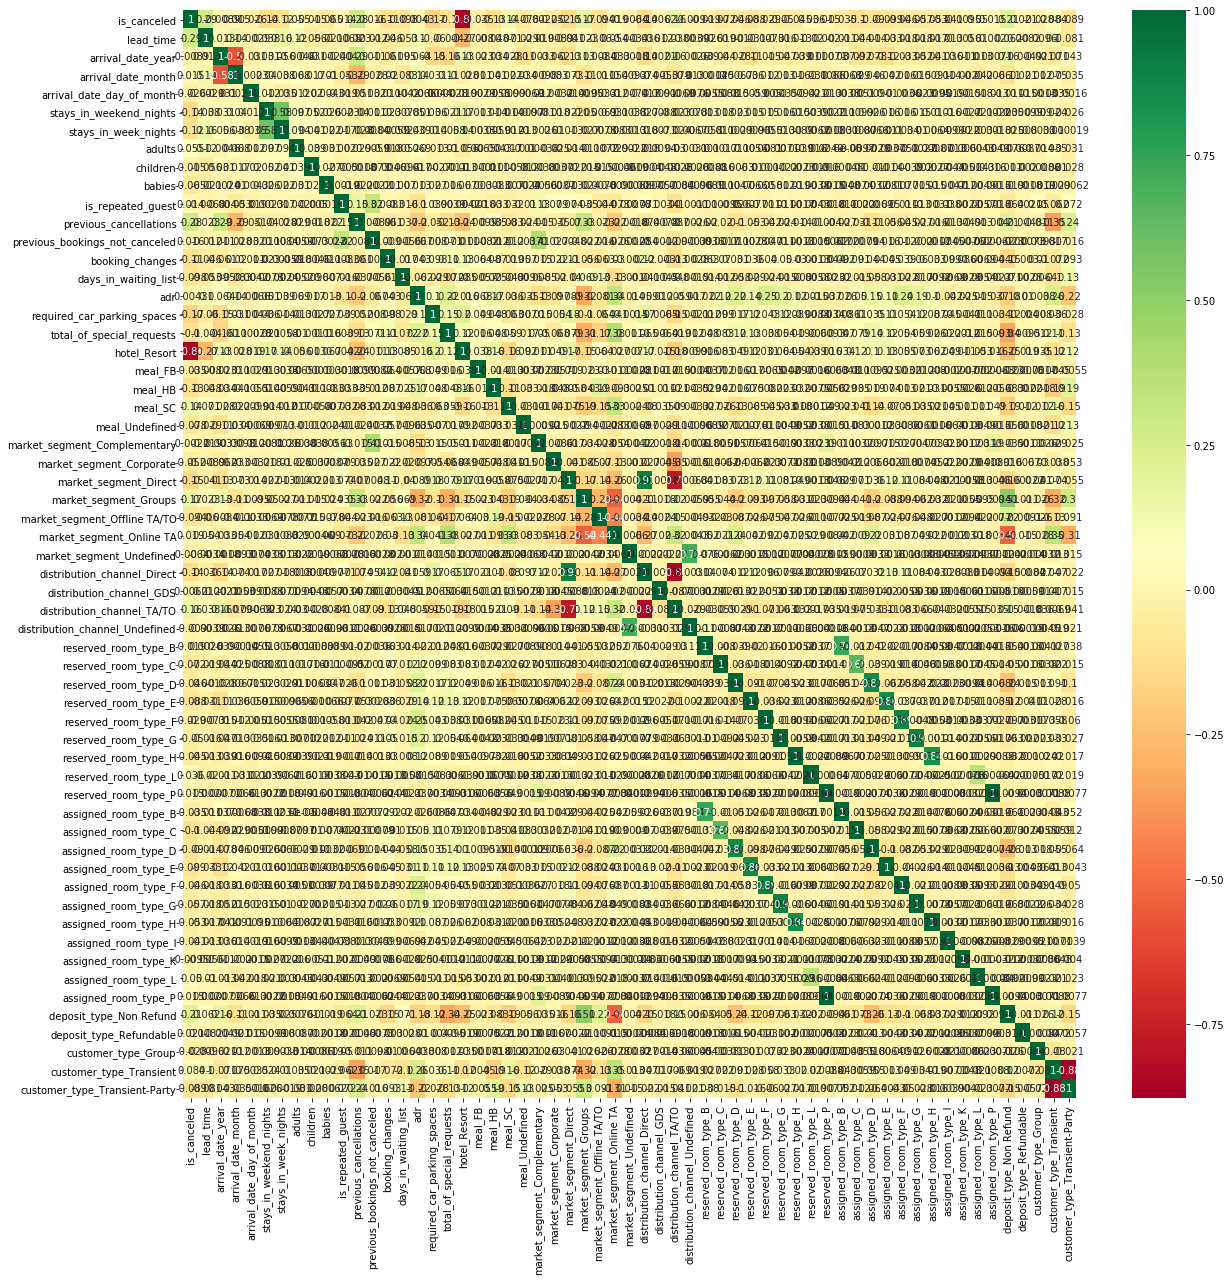

In [31]:
corr_mat=final_dataset.corr()
top_corr_features=corr_mat.index
plot.figure(figsize=(20,20))

# Plot HeatMap
g=sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [32]:
# Now we have to take our independent and dependent feature
#X(Independent)=all the attributes except 0th
#Y(Dependent)=0th attribute (is_canceled)

In [33]:
#final_dataset=final_dataset.sample(frac=.00256)
X=final_dataset.iloc[:,1:]
Y=final_dataset.iloc[:,0]
#X=X.sample(frac=.00125)
#Y=Y.sample(frac=.00125)

In [34]:
X.shape

(38826, 58)

In [35]:
Y.shape

(38826,)

In [36]:
X.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,96,2015,8,29,2,7,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,61,2015,8,29,2,10,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,19,2015,8,30,0,1,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,50,2015,8,30,0,1,1,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2015,8,30,0,1,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
X.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
    

In [38]:
X.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
    

In [39]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [40]:
###  Freature Importance that is which feature is most important for the model
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [41]:
#Greater the value Greater would be feature importance
print(model.feature_importances_)

[4.56823640e-02 8.08022579e-02 1.70410172e-02 1.88513927e-02
 9.97611217e-03 1.46554675e-02 6.37616938e-03 2.51533178e-03
 2.28604414e-04 2.90612291e-04 7.81586002e-03 3.45447508e-04
 1.88244155e-03 6.66464489e-04 1.25164060e-02 7.04088323e-04
 5.29371041e-03 7.50204508e-01 5.39706844e-06 1.07824252e-03
 1.83678354e-03 3.19943325e-04 2.87220472e-04 8.75938889e-04
 4.86435967e-04 2.33789776e-03 2.08543806e-03 1.47380543e-03
 0.00000000e+00 6.95027175e-04 5.41013368e-05 9.70109003e-04
 0.00000000e+00 2.57190038e-04 1.90422641e-04 1.54632229e-03
 6.97889218e-04 5.47652638e-04 1.99041149e-04 4.57889358e-05
 9.93808905e-05 4.72123949e-06 3.57067550e-04 2.94142130e-04
 1.70136232e-03 6.95770033e-04 5.52128021e-04 2.10052830e-04
 3.71654094e-05 4.27489123e-05 2.94934410e-06 1.58634599e-04
 3.41577980e-06 1.57444702e-03 0.00000000e+00 7.03783283e-05
 1.17289046e-03 1.18384260e-03]


In [42]:
# Above we can see
# Present Price have highest feature importance
# fuel_type_diesel have 2nd highest and so on

# It is use to generally drop those attributes which are leass valiuable and when have large number of attributes



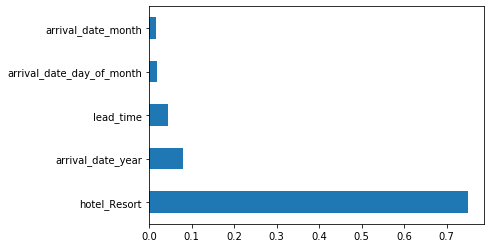

In [43]:
#For better vizualization we can also plot Feature Importance Graph
feat_importances=pds.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plot.show()

In [44]:
# Now we have to divide our dataset into train test model

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [45]:
X_train.shape

(31060, 58)

In [46]:
X_test.shape

(7766, 58)

In [47]:
Y_train.shape

(31060,)

In [48]:
Y_test.shape

(7766,)

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()                                    
# u can use tab by clciking between RandomForestRegressor and () to find extra items that can be added

In [50]:
### Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [51]:
#Randomized Search CV

# Number of Trees In Random Forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every Split
max_features = ['auto' , 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# max_depth.append(Nane)
# Mini number of samples required to split a node 

min_samples_split=[2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# crete the random Grid
random_grid = {  'n_estimators': n_estimators,
                 'max_features' : max_features,
                 'max_depth' : max_depth,
                 'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
# use the random grid to search for best hyperparameters
# First create the base mode to tune
rf= RandomForestRegressor()

In [55]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', n_iter= 10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [56]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  25.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  24.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  24.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  24.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  24.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  45.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  11.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  10.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  11.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  10.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  11.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 39.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [57]:
rf_random.score(X_test,Y_test)

-0.02226197745346484

In [58]:
  predictions=rf_random.predict(X_test)

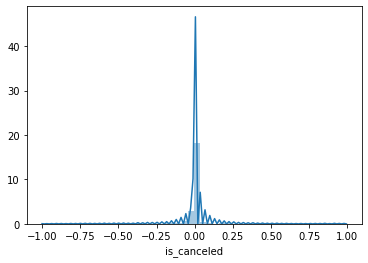

In [59]:
sns.distplot(Y_test-predictions)

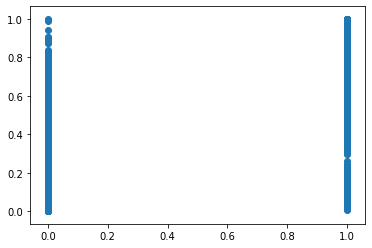

In [60]:
plot.scatter(Y_test,predictions)

In [61]:
#Now We ahve to Pickle ths file
import pickle
# Open a file where you want to store a data
file= open('random_forest_regression_model.pkl', 'wb')

# Dump information to that file
pickle.dump(rf_random, file)


# pickle file is a dserialized file which is used for deployment
# Next Step : Create a requirements.txt file
# next need to insttall FLASK in environment

In [62]:
import os

scores = {} # scores is an empty dict already
if os.path.getsize('random_forest_regression_model.pkl') > 0:
    with open('random_forest_regression_model.pkl', 'rb') as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()

In [63]:
scores

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              